# Sesión 6 - Word embeddings (Wor2vec, Glove, Fasttext) y Doc2Vec con GENSIM
En esta sesión se verá cómo utilizar la librería Gensim para el uso de word embeddings.

Los word embeddings son vectores de dimensión n que tratan de capturar el significado de la palabra y de su contexto en ese vector.
Hay distintos modelos de word embeddings preentrenados con grandes corpus que se pueden descargar y utilizar para distintos idiomas.

Primero instalaremos la librería gensim.

In [ ]:
# Instalamos gensim
!pip3 install -U gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 828.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


## Apartado 1.1 Descargamos un modelo de word embeddings preentrenado (Resuelto)
En [este repositorio](https://github.com/dccuchile/spanish-word-embeddings) existen distintos modelos de word embeddings preentrenados para el idioma español que pueden usarse con Gensim. Los ficheros word embeddings pre-entrenados suelen distribuirse como ficheros de extensión ```.vec``` que son listas hash de palabras y vector. En algunos casos también se suelen distribuir versiones en binario ```.bin```.

A continuación, vamos a descargar distintos ficheros de vectores

In [ ]:
# Descargamos Glove para español con formato vec para utilizarse con Gensim
!wget -c --no-check-certificate https://valencia.inf.um.es/valencia-plne/glove-sbwc.i25.vec.gz
!gzip -d glove-sbwc.i25.vec.gz

!wget -c --no-check-certificate https://valencia.inf.um.es/valencia-tgine/embeddings-m-model.vec.gz
!gzip -d embeddings-m-model.vec.gz
!wget -c --no-check-certificate https://valencia.inf.um.es/valencia-tgine/embeddings-m-model.bin.gz
!gzip -d embeddings-m-model.bin.gz


# Descargamos Fasttext con formato vec para utilizarse con Gensim
# Estas versiones son muy reducidas ('s'), también están las versiones 'm' y 'l'
!wget -c --no-check-certificate https://valencia.inf.um.es/valencia-plne/embeddings-s-model.vec.gz
!gzip -d embeddings-s-model.vec.gz
# Descargamos Fasttext con formato binario para utilizarse con la librería Fasttext más adelante en este notebook
!wget -c --no-check-certificate https://valencia.inf.um.es/valencia-plne/embeddings-s-model.bin.gz
!gzip -d embeddings-s-model.bin.gz

# Descargamos los datasets en español que hemos usado en otras prácticas
!wget -c --no-check-certificate https://valencia.inf.um.es/valencia-plne/dataset_train.csv
!wget -c --no-check-certificate https://valencia.inf.um.es/valencia-plne/dataset_test.csv


--2025-03-17 14:56:38--  https://valencia.inf.um.es/valencia-plne/glove-sbwc.i25.vec.gz
Resolving valencia.inf.um.es (valencia.inf.um.es)... 155.54.204.133
Connecting to valencia.inf.um.es (valencia.inf.um.es)|155.54.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 949886421 (906M) [application/x-gzip]
Saving to: ‘glove-sbwc.i25.vec.gz’

glove-sbwc.i25.vec. 100%[===================>] 905.88M  59.3MB/s    in 16s     

2025-03-17 14:56:54 (57.9 MB/s) - ‘glove-sbwc.i25.vec.gz’ saved [949886421/949886421]

--2025-03-17 14:57:24--  https://valencia.inf.um.es/valencia-tgine/embeddings-m-model.vec.gz
Resolving valencia.inf.um.es (valencia.inf.um.es)... 155.54.204.133
Connecting to valencia.inf.um.es (valencia.inf.um.es)|155.54.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443876411 (423M) [application/x-gzip]
Saving to: ‘embeddings-m-model.vec.gz’

embeddings-m-model. 100%[===================>] 423.31M  60.0MB/s    in 7.4s  

Ahora, para trabajar con los word-embeddings en Gensim necesitamos la librería ```KeyedVectors```, que permite trabajar con ficheros con formato ```.vec``` usando la función ```load_word2vec_format```.

In [ ]:
 from gensim.models.keyedvectors import KeyedVectors
 import gensim
 # Cargamos el modelo de Glove en Gensim
 glove_gensim_model = KeyedVectors.load_word2vec_format("glove-sbwc.i25.vec")

 # Podemos cargar también los embeddings de Fasttext
 #glove_gensim_model = KeyedVectors.load_word2vec_format("embeddings-m-model.vec")
 #glove_gensim_model = KeyedVectors.load_word2vec_format("embeddings-s-model.vec")


# Apartado 1.2 Obtener los vectores de palabras

Vamos a usar la función `get_vector` para obtener los vectores de algunas palabras, tales como "murcia", "madrid", "barcelona" con el conjunto preentrenado de embeddings cargado en la celda anterior. Puedes probar tú también otras palabras y diferentes formas como el singular o el plural.

**Nota**: Puedes meter el vector resultante en un DataFrame de Pandas para ver la longitud más fácilmente.

**Preguntas**
- ¿Qué longitud tienen los vectores resultantes?
- ¿Qué ocurre cuando una palabra no se encuentra dentro del vector?

In [ ]:
words = ['murcia','madrid','barcelona','motomami']

import pandas as pd

# Creamos un diccionario de términos
vectors = {}

# Iteramos sobre nuestra lista de palabras
for word in words:

  # Nos aseguramos de tener dicho índice
  if (glove_gensim_model.has_index_for (word)):
    vectors[word] = glove_gensim_model.get_vector (word)

# Creamos nuestro DataFrame
pd.DataFrame (vectors).T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
murcia,-0.365614,-0.077264,-0.345314,0.378451,0.550952,0.779145,0.193098,-0.201790,0.432541,-0.359151,...,0.472759,0.297716,0.444134,-0.197923,0.099203,0.499622,-0.359967,0.229572,-0.300323,1.122099
madrid,-0.151601,0.136578,-0.241750,0.183367,0.247513,1.130152,-0.704062,-0.920787,-0.249835,-0.784116,...,0.321519,0.862754,-0.227442,-0.279299,0.374716,0.224290,-0.239169,0.070487,0.247087,0.395935
barcelona,0.119307,0.145373,-0.227730,-0.213656,0.459321,0.400238,-0.299609,-0.442588,-0.226974,-0.626232,...,0.227210,0.654154,-0.190097,-0.170491,0.123612,0.166192,-0.125271,0.218895,0.432648,0.262428


##Apartado 1.3 Calculamos la similitud de distintas palabras
Con los word embeddings podemos calcular la similitud de distintos términos usando la similitud del coseno. Para eso Gensim proporciona una función para determinar su similitud, llamada `similarity`.

In [ ]:
# Calculamos la similitud entre las palabras alumno y estudiante
palabra1="alumno"
palabra2="estudiante"
sim = glove_gensim_model.similarity(palabra1, palabra2)
print('La similitud entre '+palabra1+' y '+palabra2+' es:',sim)

# Calculamos la similitud entre 'españa' y 'francia'

# Calculamos la similitud entre 'españa' y 'madrid'

# Calculamos la similitud entre 'españa' y 'alumno'

# Calculamos la similitud entre 'rojo' y 'azul'


La similitud entre alumno y estudiante es: 0.7361078
La similitud entre 'españa' y 'francia' es: 0.6711971163749695
La similitud entre 'españa' y 'madrid' es: 0.7140533328056335
La similitud entre 'españa' y 'alumno' es: 0.21474717557430267
La similitud entre 'rojo' y 'azul' es: 0.738480806350708


###Ejercicio. (Resuelto)

Calcula la similitud entre los términos, tales como: ```['perro', 'gato', 'pez', 'mascota', 'murcia', 'madrid', 'barcelona', 'españa', 'estudiante', 'alumno']```

Pon los resultados dentro de una matriz de similitud con un mapa de calor de ```seanborn```.

<Axes: >

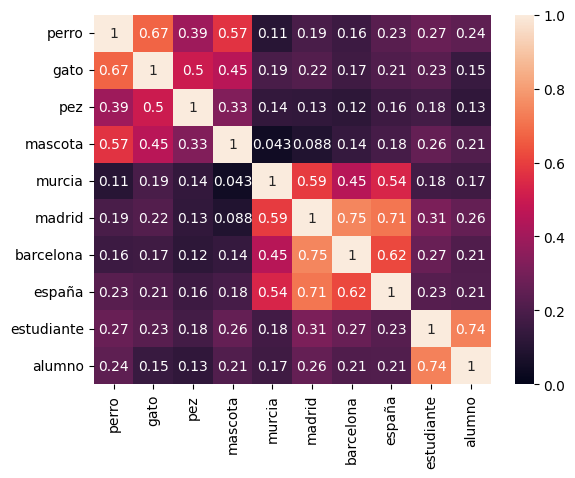

In [ ]:
# Usamos seaborn para usar un mapa de calor.
import seaborn as sns

# Listado de términos para revisar
terms = ['perro', 'gato', 'pez', 'mascota', 'murcia', 'madrid', 'barcelona', 'españa', 'estudiante', 'alumno']

# Matriz 2-D para almacenar los resultados
matrix = [[glove_gensim_model.similarity (term1, term2) for term2 in terms] for term1 in terms]

# Creamos un dataframe para poder poner las labels más fácilmente
df = pd.DataFrame (matrix, columns = terms, index = terms)

# Lo mostramos con un mapa de similitud
sns.heatmap (df, annot = True, vmin = 0, vmax = 1)

# Apartado 1.4 Obtenemos términos similares
En elercicio anterior hemos calculado las similitudes entre términos conocidos. Sin embargo, también podemos hacer uso de los word embeddings para obtener los términos más similares con respecto a uno dado.

Calcula los 10 términos más similares a las siguientes palabras utilizando la función [`most_similar`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html)

In [ ]:
# Imprimimos las palabras más similares a 'madrid'
palabra = 'madrid'
print(glove_gensim_model.most_similar(palabra))

# Imprimimos las palabras más similares a 'españa'

# Imprimimos las palabras más similares a 'tenis'

# Imprimimos las palabras más similares a 'amarillo'


[('barcelona', 0.7481707334518433), ('valencia', 0.7286534309387207), ('sevilla', 0.7230772972106934), ('españa', 0.7140534520149231), ('valladolid', 0.6981064677238464), ('zaragoza', 0.680424690246582), ('málaga', 0.6680708527565002), ('bilbao', 0.665088951587677), ('real', 0.6523774862289429), ('española', 0.6463478803634644)]
[('española', 0.7366926074028015), ('madrid', 0.7140533328056335), ('francia', 0.6711971759796143), ('portugal', 0.6674736738204956), ('europa', 0.6646955013275146), ('español', 0.662998378276825), ('país', 0.6526250839233398), ('espańa', 0.6497336030006409), ('españolas', 0.6376960873603821), ('italia', 0.6304250359535217)]
[('baloncesto', 0.639200747013092), ('golf', 0.6366766095161438), ('voleibol', 0.624140739440918), ('atletismo', 0.614983856678009), ('canchas', 0.605154275894165), ('fútbol', 0.6021850109100342), ('torneos', 0.5784527659416199), ('natación', 0.5733251571655273), ('deporte', 0.5721799731254578), ('hockey', 0.5662410259246826)]
[('rojo', 0.7

# Apartado 1.5 Haciendo analogías

Con las similitudes de word embeddings se pueden hacer analogías haciendo operaciones con los vectores.

Por ejemplo, podríamos hacer la siguiente analogía:
```
*francés* es a *Francia* lo que *Italiano* es a ...
```

con el siguiente código, utilizando `positive` y `negative` para influir sobre los términos que pueden aparecer.

```
glove_gensin_model.most_similar (
  positive = ["italiano", "francia"],
  negative = ["francés"],
  topn = 1
)
```



In [ ]:
  # Francés es a Francia lo que Italiano es a ...
  print(glove_gensim_model.most_similar(positive=["italiano", "francia"], negative=["francés"], topn=1))

  # Francia es a París lo que España es a ...

  # Hombre es a rey lo que mujer es a ...

  # Cantar es a cantaba lo que temer es a ...

  # Enfermera es a hospital lo que juez es a ...


[('italia', 0.8575731515884399)]
[('madrid', 0.7791808843612671)]
[('monarca', 0.6101459860801697)]
[('temía', 0.43924930691719055)]
[('juzgado', 0.6214022636413574)]


También se pueden mostrar más de 1 opción y no solamente la primera opción de la analogía.

In [ ]:
  # Francés es a Francia lo que Italiano es a ...
  print(glove_gensim_model.most_similar(positive=["italiano", "francia"], negative=["francés"], topn=10))

  # Francia es a París lo que España es a ,,,

  # Hombre es a rey lo que mujer es a ...

  # Cantar es a cantaba lo que temer es a ...

  # Enfermera es a hospital lo que juez es a ...

  # Enfermera es a hospital lo que profesor es a ...


[('italia', 0.8575731515884399), ('italiana', 0.6234793066978455), ('roma', 0.6066861152648926), ('italianos', 0.5899349451065063), ('nápoles', 0.5797626376152039), ('milán', 0.5797608494758606), ('españa', 0.5516084432601929), ('portugal', 0.5490608811378479), ('alemania', 0.5487722754478455), ('grecia', 0.539060115814209)]
[('madrid', 0.7791808843612671), ('barcelona', 0.681670606136322), ('española', 0.6255769729614258), ('sevilla', 0.6246100664138794), ('valencia', 0.6032580137252808), ('español', 0.6013212203979492), ('londres', 0.5997290015220642), ('bilbao', 0.5572124719619751), ('valladolid', 0.5506395101547241), ('habana', 0.5470088124275208)]
[('monarca', 0.6101459860801697), ('hermano', 0.5665531754493713), ('sabio', 0.558095395565033), ('príncipe', 0.540009081363678), ('aquel', 0.539376437664032), ('dios', 0.5264018774032593), ('reyes', 0.5219205617904663), ('padre', 0.518507719039917), ('anciano', 0.5177708864212036), ('amigo', 0.5136955976486206)]
[('temía', 0.43924930691

## Apartado 1.6 Detectando el término no relacionados

También hay una función que permite determinar el término que no está relacionado con los demás términos

In [ ]:
print(glove_gensim_model.doesnt_match(['blanco','azul','rojo','amarillo','verde','calamar']))

# Ver qué palabra no encaja en la siguiente lista 'tenis', 'fútbol', 'baloncesto', 'informática', 'gimnasia'
print(glove_gensim_model.doesnt_match(['tenis', 'fútbol', 'baloncesto', 'informática', 'gimnasia']))

calamar
informática


# Apartado 1.7 Visualización de *vectores de palabras*

En el siguiente ejemplo, se puede ver la visualización gráfica en 2D de la distancia entre distintas familias de palabras.

In [ ]:
# Función para pintar las palabras en una gráfica
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

def display_wordlist (model, wordlist):
  """
  display_wordlist

  @param model Gensim model
  @parm wordlist Lista de palabras
  """

  # Primero obtenemos los vectores de las palabras como un diccionario
  vectors = {word: model[word] for word in wordlist if model.has_index_for (word)}


  # Luego lo pasamos a un Dataframe, porque es más fácil trabajar así.
  # Además, trasponemos la matriz para tener los nombres como filas, y los
  # valores del embedding como columnas.
  df = pd.DataFrame (vectors).T


  # Antes de reducir a 2 dimensiones, vamos a reducir la dimensionalidad al
  # número de palabras que tenemos usando una técnica llamada PCA
  reduc = PCA (
      n_components = len (wordlist)
  ).fit_transform (df)


  # Ahora usamos otra técnica llamada TSNE para reducir la dimensionalidad a
  # 2 dimensiones, y poder mostrarlo en una gráfica.
  tsne = TSNE (perplexity = 5, n_components = 2, random_state = 0)
  np.set_printoptions (suppress = True)
  coords = tsne.fit_transform (reduc)


  # Obtenemos las coordenadas de la cada eje de manera individual
  x_coords = coords[:, 0]
  y_coords = coords[:, 1]


  # Creamos la figura
  plt.figure (figsize = (16, 8))
  plt.plot (x_coords, y_coords, 'ro')

  # Coordenadas
  for label, x, y in zip (df.index, x_coords, y_coords):
    plt.annotate (
      label,
      xy = (x, y),
      xytext = (5, 2),
      textcoords = 'offset points'
    )

  plt.xlim (x_coords.min () - 10, x_coords.max () + 10)
  plt.ylim (y_coords.min () - 10, y_coords.max () + 10)
  plt.show ()

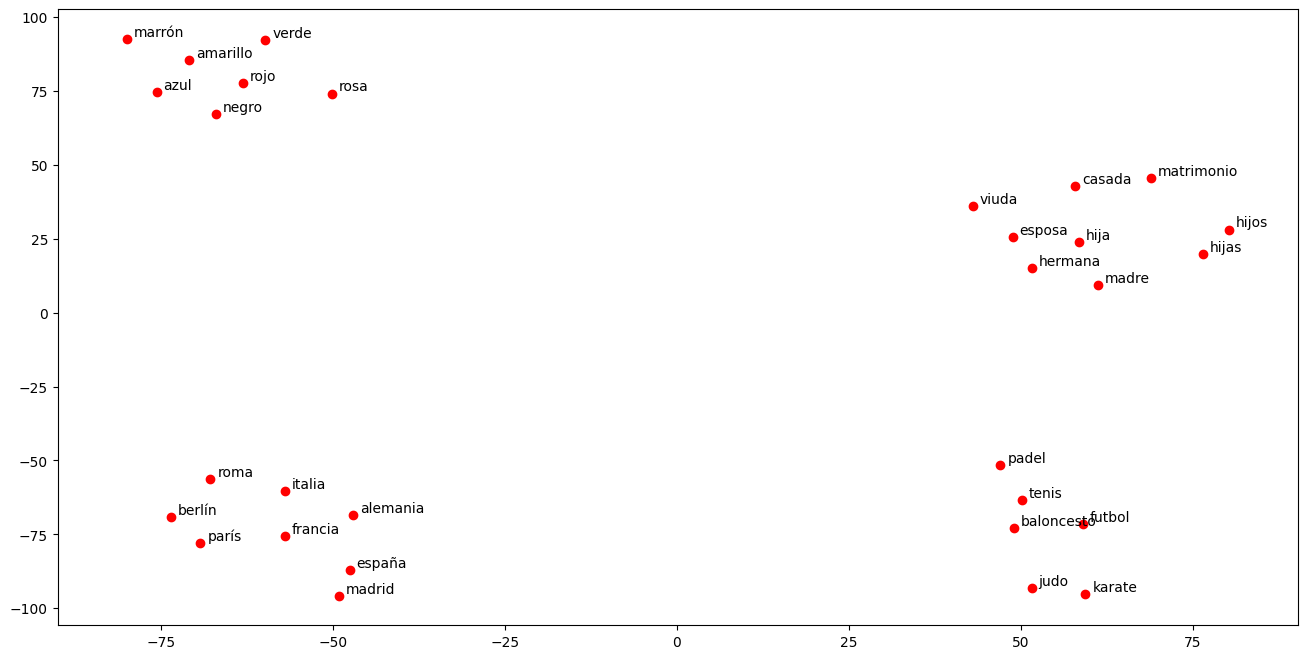

In [ ]:
# Visualizamos algunas palabras
display_wordlist(glove_gensim_model, ['judo', 'karate','baloncesto','tenis','futbol','padel',
                                      'hija','esposa','hijos','madre','hermana','hijas','matrimonio','viuda', 'casada',
                                      'españa','madrid','francia','parís','italia','roma','alemania','berlín',
                                      'azul','verde','rosa','amarillo','rojo','marrón','negro'])


# Apartado 1.8 Sentence embeddings


Ahora lo que vamos a hacer es representar fragmentos de texto como frases o párrafos con embeddings. Es lo que se conoce como **sentence embeddings**.

Calcular estos embeddings se puede realizar de distintas maneras. En primer lugar, vamos a hacer esto de manera manual haciendo la media aritmética de los vectores de las palabras que forman el texto.

Para ello, crea una función llamada ```gensim_sentence_embeddings```que tenga como argumento un modelo de embeddings y una frase.


In [ ]:
# Esta función calcula en un único vector la media aritmética de todos los vectores de tokens
# de un array de textos dado.
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

def gensim_sentence_embeddings(texto, model, idiomaStopWords):
    import nltk
    from nltk.corpus import stopwords
    import gensim
    import numpy as np
#esta función devuelve los sentence embeddings de todos los textos enviados como parámetros
    stopwords_list=stopwords.words(idiomaStopWords)
    # Obtener el número de dimensiones
    num_dimensiones = model.vector_size
    sentence_embeddings = []
    line_vec = []
    tokenized_text = nltk.tokenize.word_tokenize(texto)
    count = 0
    for token in tokenized_text:
       if (token not in stopwords_list):
        # Solamente calculamos los vectores de lo que no son stopwords
        if model.has_index_for(token):
          a = model.get_vector(token)
          if len(line_vec) == 0 :
            line_vec = a
          else:
            line_vec = line_vec + a
          count = count + 1
    if(count>0):
      sentence_embeddings= line_vec/count
    else:
      # Si es 0 devolvemos un array de 0 de las mismas dimensiones
      sentence_embeddings = np.zeros(num_dimensiones)
    return sentence_embeddings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Podemos calcular e imprimir los sentence embedings de varias frases.
# Hay que tener en cuenta que si no existe ningún token conocido en el vocabulario obtendríamos un vector de 0s
# Esto no ocurre con los modelos de Fasttext porque usan fragmentos de caracteres, pero sí con los de Glove o Word2Vec
frases =['me gusta el día','cacacaca erererre', 'motomami']

# Creamos un diccionario de frases
vectors = {}

# Iteramos sobre nuestra lista de palabras
for frase in frases:
  vectors[frase] = gensim_sentence_embeddings(frase, glove_gensim_model, 'spanish')

# Creamos nuestro DataFrame
pd.DataFrame (vectors).T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
me gusta el día,-0.349078,0.507492,0.087488,0.075181,0.417464,0.153205,-0.084192,-0.119025,-0.183194,-0.086342,...,-0.239467,0.493444,-0.070328,-0.014505,-0.241255,-0.081566,-0.06642,0.26934,0.051721,-0.081991
cacacaca erererre,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
motomami,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


Podemos probar ahora mediante sentence embeddings cómo pueden parecerse distintos fragmentos de texto o documentos mediante el uso de la similitud del coseno.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Definimos un conjunto de textos
textos=['El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. \
Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje.\
Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.'
, 'El procesamiento del lenguaje natural (NLP, por sus siglas en inglés) es una rama de la inteligencia artificial que ayuda a las computadoras a entender, interpretar y manipular el lenguaje humano. \
NLP toma elementos prestados de muchas disciplinas, incluyendo la ciencia de la computación y la lingüística computacional, en su afán por cerrar la brecha entre la comunicación humana y el entendimiento de las computadoras."""], """El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje. Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.'
, 'La lingüística computacional es un campo interdisciplinario que se ocupa del desarrollo de formalismos del funcionamiento del lenguaje natural, tales que puedan ser transformados en programas ejecutables para un ordenador. \
Dicho desarrollo se sitúa entre el modelado basado en reglas y el modelado estadístico del lenguaje natural desde una perspectiva computacional, y en él participan lingüistas e informáticos especializados en inteligencia artificial, psicólogos cognoscitivos y expertos en lógica, entre otros.'
, 'El aprendizaje automático es un tipo de inteligencia artificial (AI) que proporciona a las computadoras la capacidad de aprender, sin ser programadas explícitamente. El aprendizaje automático se centra en el desarrollo de programas informáticos que pueden cambiar cuando se exponen a nuevos datos.'
, 'El  aprendizaje profundo es un tema que cada vez adquiere mayor relevancia en el campo de la inteligencia artificial (IA). Siendo una subcategoría del aprendizaje automático, el aprendizaje profundo trata del uso de redes neuronales para mejorar cosas tales como el reconocimiento de voz, la visión por ordenador y el procesamiento del lenguaje natural. \
Rápidamente se está convirtiendo en uno de los campos más solicitados en informática. \
En los últimos años, el aprendizaje profundo ha ayudado a lograr avances en áreas tan diversas como la percepción de objetos, el procesamiento del lenguaje natural y el reconocimiento de voz (todas ellas áreas especialmente complejas para los investigadores en IA).',
'El coste de la energía va a subir mucho los próximos meses y la población va a tener que pagar cantidades excesivas a las eléctricas']

# Calculamos la similitud usando sentence embeddings
sentence_embeddings = []
for frase in textos:
  sentence_embeddings.append(gensim_sentence_embeddings(frase, glove_gensim_model,'spanish'))

import numpy as np
import scipy.sparse as sp
if not sp.issparse(sentence_embeddings):
            sentence_embeddings = sp.csr_matrix(sentence_embeddings, dtype=np.float64)

# Calculamos la similitud del primer documento con el resto de documentos
results = cosine_similarity(sentence_embeddings[1::],sentence_embeddings[0]).reshape(-1,) # Op -- (n_docs,1) -- Cosine Sim with each doc
print(results)

[0.98916187 0.91941754 0.88821989 0.94367842 0.73421973]


Probamos ahora a entrenar los dataset proporcionados para probar su accuracy utilizando word embeddings preentrenados.

In [ ]:
import pandas
df_train = pandas.read_csv("dataset_train.csv",encoding="UTF-8")
df_test = pandas.read_csv("dataset_test.csv",encoding="UTF-8")

# Ponemos en lower_case los dos conjuntos de tweets
df_train.tweet = df_train.tweet.apply(lambda x: x.lower())
df_test.tweet = df_test.tweet.apply(lambda x: x.lower())

print("Ejemplos usados para entrenar: ", len(df_train))
print("Ejemplos usados para test: ", len(df_test))

Ejemplos usados para entrenar:  4171
Ejemplos usados para test:  1788


In [ ]:
from sklearn.svm import LinearSVC
sentence_train = df_train['tweet'].apply(lambda x: gensim_sentence_embeddings(x, glove_gensim_model,'spanish'))
sentence_test = df_test['tweet'].apply(lambda x: gensim_sentence_embeddings(x, glove_gensim_model,'spanish'))


clf_sentence_embeddings = LinearSVC(random_state=0, tol=1e-5).fit(sentence_train.tolist(), df_train.label)
predicted = clf_sentence_embeddings.predict(sentence_test.tolist())
accuracy = np.mean(predicted == df_test.label)

print("Resultados ----- Accuracy:", accuracy)
from sklearn import metrics
print(metrics.classification_report(df_test.label, predicted))

Resultados ----- Accuracy: 0.8003355704697986
              precision    recall  f1-score   support

    negative       0.73      0.57      0.64       561
    positive       0.82      0.90      0.86      1227

    accuracy                           0.80      1788
   macro avg       0.78      0.74      0.75      1788
weighted avg       0.79      0.80      0.79      1788



##Apartado 1.9 - FastText

Aunque Gensim permite utilizar embeddings de fastText, la tokenización que realiza se basa en Word2Vec, así que las palabras desconocidas (**OOV**) no tienen representación ya que no se encuentra un vector con la función `has_index_for`.

Para eso podemos instalar la librería fasttext.

In [ ]:
# Instalamos la librería Fasttext y descargamos el modelo preentrenado para el español en binario
!pip3 install fasttext
import fasttext
# Los word embeddings preentrenados ya se han descargado anteriormente

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313472 sha256=30ad1ecef6a9117f6815315c6ad3afc11b9e0ad5583b22572381ec9d27793752
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
# Cargamos el modelo en binario usando la librería fasttext.
#ft_model = fasttext.load_model ("embeddings-m-model.bin")
ft_model = fasttext.load_model ("embeddings-s-model.bin")

A continuación obtenemos la representación vectorial de la palabra "motomami" por ejemplo y de una palabra inventada como "aeiouaeiou"

In [ ]:
vector = ft_model.get_word_vector("holalala")
#Mostramos las 6 primeras coordenadas
print(vector[:6])

vector = ft_model.get_word_vector("aeiouaeiou")
#Mostramos las 6 primeras coordenadas
print(vector[:6])

[ 0.39490592 -0.45491135  0.65146405  0.8123323   0.17195328 -0.3402024 ]
[-0.29263294 -0.29305226 -0.07346266  0.7548459   1.4783884  -0.5980789 ]


Podemos ver a continuación las subpalabras que se obtienen en fasttext dado una palabra dada y cuál sería el vector de cada subpalabra.

Podemos observar que el embedding de la palabra es la media de los vectores de las subpalabras.

In [ ]:
word = 'motomami'
# Obtener los n-gramas y sus índices
subwords, indices = ft_model.get_subwords(word)

# Obtener los vectores de cada n-grama
subword_vectors = {subword: ft_model.get_input_vector(idx) for subword, idx in zip(subwords, indices)}

# Mostrar los n-gramas y sus vectores
for subword, vector in subword_vectors.items():
    print(f"Subpalabra: {subword} -> Vector (primeros 5 valores): {vector[:5]}")

vectors_array = np.array(list(subword_vectors.values()))
subword_mean = np.mean(vectors_array, axis=0)

print(f"Palabra: {word} -> Vector (primeros 5 valores): {ft_model.get_word_vector(word)[:5]}")
print(f"Palabra: {word} -> Vector (primeros 5 valores): {subword_mean[:5]}")

Subpalabra: <mo -> Vector (primeros 5 valores): [ 0.4946093  -2.1682456   2.2707942   2.4833002   0.48527184]
Subpalabra: <mot -> Vector (primeros 5 valores): [-3.332991   0.8897533  1.4314964 -2.5178797 -1.3820633]
Subpalabra: <moto -> Vector (primeros 5 valores): [ 3.8935394  -0.9888346  -5.3031344   1.8848335   0.11568845]
Subpalabra: <motom -> Vector (primeros 5 valores): [ 1.1976271  -4.1768465   1.0979155  -4.397954    0.39417177]
Subpalabra: mot -> Vector (primeros 5 valores): [-1.6821992   3.4959261  -0.7129723   1.0603876   0.18844526]
Subpalabra: moto -> Vector (primeros 5 valores): [-1.1136621 -0.5231354 -6.575054   3.6364899 -2.1800737]
Subpalabra: motom -> Vector (primeros 5 valores): [-0.1988492  1.2042695  0.9610069  2.948558   4.584593 ]
Subpalabra: motoma -> Vector (primeros 5 valores): [ 1.1945434 -0.6909405 -3.6617255  4.894961  -3.1389072]
Subpalabra: oto -> Vector (primeros 5 valores): [-3.2760725   1.6481067  -2.2668462   1.615913    0.29050264]
Subpalabra: otom -

Podemos también calcular las palabras más similares a una dada.

In [ ]:
word = "madrid"

# Obtener las 10 palabras más similares
similar_words = ft_model.get_nearest_neighbors(word, k=10)

# Mostrar las palabras similares
print(f"Palabras similares a '{word}':")
for similarity, similar_word in similar_words:
    print(f"{similar_word} -> Similitud: {similarity:.4f}")

Palabras similares a 'madrid':
sevilla -> Similitud: 0.9594
bilbao -> Similitud: 0.9507
barcelona -> Similitud: 0.9494
málaga -> Similitud: 0.9415
valencia -> Similitud: 0.9366
gijón -> Similitud: 0.9356
alicante -> Similitud: 0.9270
coruña -> Similitud: 0.9267
vitoria -> Similitud: 0.9230
zaragoza -> Similitud: 0.9230


O hacer analogías

In [ ]:
import fasttext

# Definir palabras para la analogía
a, b, c =  "rey", "hombre", "mujer"  # "hombre" es a "rey" como "mujer" es a "X"

# Calcular el vector de la analogía
vector_resultado = ft_model.get_word_vector(b) - ft_model.get_word_vector(a) + ft_model.get_word_vector(c)

# Buscar la palabra más cercana a este vector
similar_words = ft_model.get_analogies(a,b,c)

# Mostrar las mejores opciones
for score, word in similar_words[:5]:
    print(f"{word} (score: {score})")

infanta (score: 0.8249217867851257)
eufrosinia (score: 0.824508011341095)
enriqueviii (score: 0.8228399753570557)
cantacucena (score: 0.8068484663963318)
reina (score: 0.8050245046615601)


## Apartado 1.10 Sentence embeddings de Fasttext

Nosotros hemos implementado una función para obtener los sentence embeddings directamente desde la librería Fasttext. Fasttext es otro tipo de word embeddings donde se tienen en cuenta los char n gramas.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Definimos un conjunto de textos
textos=['El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. \
Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje.\
Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.'
, 'El procesamiento del lenguaje natural (NLP, por sus siglas en inglés) es una rama de la inteligencia artificial que ayuda a las computadoras a entender, interpretar y manipular el lenguaje humano. \
NLP toma elementos prestados de muchas disciplinas, incluyendo la ciencia de la computación y la lingüística computacional, en su afán por cerrar la brecha entre la comunicación humana y el entendimiento de las computadoras."""], """El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje. Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.'
, 'La lingüística computacional es un campo interdisciplinario que se ocupa del desarrollo de formalismos del funcionamiento del lenguaje natural, tales que puedan ser transformados en programas ejecutables para un ordenador. \
Dicho desarrollo se sitúa entre el modelado basado en reglas y el modelado estadístico del lenguaje natural desde una perspectiva computacional, y en él participan lingüistas e informáticos especializados en inteligencia artificial, psicólogos cognoscitivos y expertos en lógica, entre otros.'
, 'El aprendizaje automático es un tipo de inteligencia artificial (AI) que proporciona a las computadoras la capacidad de aprender, sin ser programadas explícitamente. El aprendizaje automático se centra en el desarrollo de programas informáticos que pueden cambiar cuando se exponen a nuevos datos.'
, 'El  aprendizaje profundo es un tema que cada vez adquiere mayor relevancia en el campo de la inteligencia artificial (IA). Siendo una subcategoría del aprendizaje automático, el aprendizaje profundo trata del uso de redes neuronales para mejorar cosas tales como el reconocimiento de voz, la visión por ordenador y el procesamiento del lenguaje natural. \
Rápidamente se está convirtiendo en uno de los campos más solicitados en informática. \
En los últimos años, el aprendizaje profundo ha ayudado a lograr avances en áreas tan diversas como la percepción de objetos, el procesamiento del lenguaje natural y el reconocimiento de voz (todas ellas áreas especialmente complejas para los investigadores en IA).',
'El coste de la energía va a subir mucho los próximos meses y la población va a tener que pagar cantidades excesivas a las eléctricas']


import pandas as pd
df_textos = pd.DataFrame(textos)

# Calculamos la similitud usando sentence embeddings
fasttext_sentence_embeddings = df_textos[0].apply(lambda x: ft_model.get_sentence_vector(x))
fasttext_sentence_embeddings = fasttext_sentence_embeddings.to_list()
import numpy as np

import scipy.sparse as sp
if not sp.issparse(fasttext_sentence_embeddings):
            fasttext_sentence_embeddings = sp.csr_matrix(fasttext_sentence_embeddings, dtype=np.float64)

# Calculamos la similitud del primer documento con el resto para sentence embeddings
results = cosine_similarity(fasttext_sentence_embeddings[1::],fasttext_sentence_embeddings[0]).reshape(-1,) # Op -- (n_docs,1) -- Cosine Sim with each doc
print(results)

[0.99586123 0.97653438 0.96497823 0.97840502 0.85345728]


Entrenamos ahora la tarea de clasificación de texto anterior con los sentence embeddings de fasttext y obtenemos el accuracy

In [ ]:
from sklearn.svm import LinearSVC
fasttext_sentence_train = df_train['tweet'].apply(lambda x: ft_model.get_sentence_vector(x))
fasttext_sentence_test = df_test['tweet'].apply(lambda x: ft_model.get_sentence_vector(x))

clf_sentence_embeddings = LinearSVC(random_state=0, tol=1e-5).fit(fasttext_sentence_train.to_list(), df_train.label)
predicted = clf_sentence_embeddings.predict(fasttext_sentence_test.to_list())
accuracy = np.mean(predicted == df_test.label)

print("Resultados sentence embeddings Fasttext ----- Accuracy:", accuracy)
from sklearn import metrics
print(metrics.classification_report(df_test.label, predicted))

Resultados sentence embeddings Fasttext ----- Accuracy: 0.7880313199105146
              precision    recall  f1-score   support

    negative       0.74      0.50      0.60       561
    positive       0.80      0.92      0.86      1227

    accuracy                           0.79      1788
   macro avg       0.77      0.71      0.73      1788
weighted avg       0.78      0.79      0.77      1788



Si probamos con vectores de FastText de más dimensiones (300), en principio, la clasificación debería ser mejor.

In [ ]:
#Si probamos con unos vectores de Fasttext de más dimensiones (300) en principio la clasificación debería ser mejor.
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.bin.gz
!gzip -d cc.es.300.bin.gz

--2025-03-17 15:44:21--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.239.50.120, 18.239.50.9, 18.239.50.18, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.239.50.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4500107671 (4.2G) [application/octet-stream]
Saving to: ‘cc.es.300.bin.gz’

cc.es.300.bin.gz    100%[===================>]   4.19G  50.0MB/s    in 83s     

2025-03-17 15:45:44 (51.8 MB/s) - ‘cc.es.300.bin.gz’ saved [4500107671/4500107671]



In [ ]:
#Cargamos el modelo más grande
ft_model = fasttext.load_model ("cc.es.300.bin")

#Calculamos los embeddings y creamos el clasificador
fasttext_sentence_train = df_train.tweet.apply(lambda x: ft_model.get_sentence_vector(x))
fasttext_sentence_test = df_test.tweet.apply(lambda x: ft_model.get_sentence_vector(x))

clf_sentence_embeddings = LinearSVC(random_state=0, tol=1e-5).fit(fasttext_sentence_train.to_list(), df_train.label)
predicted = clf_sentence_embeddings.predict(fasttext_sentence_test.to_list())
accuracy = np.mean(predicted == df_test.label)

print("Resultados Fasttext modelo más grande ----- Accuracy:", accuracy)
from sklearn import metrics
print(metrics.classification_report(df_test.label, predicted))

Resultados Fasttext modelo más grande ----- Accuracy: 0.8215883668903803
              precision    recall  f1-score   support

    negative       0.77      0.62      0.69       561
    positive       0.84      0.91      0.88      1227

    accuracy                           0.82      1788
   macro avg       0.80      0.77      0.78      1788
weighted avg       0.82      0.82      0.82      1788

